# Exercise: Optimize Hornsrev1 layoutV80 example turbine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from py_wake.examples.data.hornsrev1 import V80, Hornsrev1Site, wt_x, wt_y
from py_wake.wake_models import Fuga
from py_wake.tests.test_files.fuga import LUT_path_2MW_z0_0_03
from py_wake.aep_calculator import AEPCalculator
site = Hornsrev1Site()
wt = V80()
wake_model = Fuga(LUT_path_2MW_z0_0_03, site, wt)
aep_calc = AEPCalculator(wake_model)

[0.035971520359715195,
 0.0394868203948682,
 0.051673950516739516,
 0.0700015407000154,
 0.0836454708364547,
 0.06434850064348502,
 0.08643194086431942,
 0.11770510117705096,
 0.15157570151575697,
 0.14737920147379202,
 0.10012050100120501,
 0.05165975051659751]

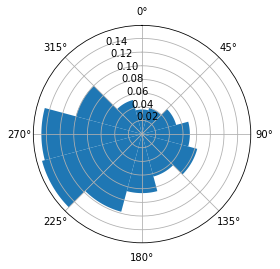

In [3]:
site.plot_wd_distribution(n_wd=12)

AEP ref 692.8008497017129


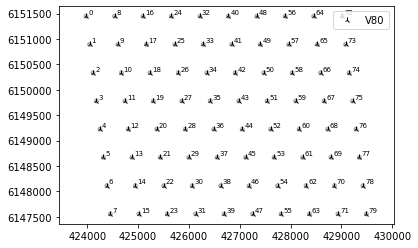

In [5]:
# Original layout and AEP
wt.plot(wt_x, wt_y)
aep_ref = aep_calc.calculate_AEP(wt_x,wt_y).sum()
print ("AEP ref", aep_ref)

**Exercise**

Modify the x and y offsets for the rows and columns to increase the AEP.

Note, the turbines positions are limited by a rectangle surrounding the existing layout

AEP ref 692.8008497017129
AEP 692.8459321400454
Increase: 0.006507 %


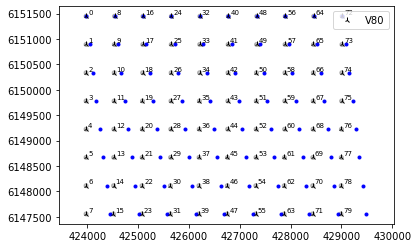

In [6]:
def add_offset_plot_and_print(row_offset_x, row_offset_y, col_offset_x, col_offset_y):
    x,y = wt_x, wt_y
    y = np.reshape(y,(10,8)).astype(np.float)
    x = np.reshape(x,(10,8)).astype(np.float)

    x+= np.array(row_offset_x)
    y+= np.array(row_offset_y)
    x+= np.array(col_offset_x)[:,np.newaxis]
    y+= np.array(col_offset_y)[:,np.newaxis]
    y = np.maximum(min(wt_y), np.minimum(max(wt_y), y.flatten()))
    x = np.maximum(min(wt_x), np.minimum(max(wt_x), x.flatten()))

    plt.plot()
    plt.plot(wt_x, wt_y,'b.')
    wt.plot(x, y)
    aep = aep_calc.calculate_AEP(x,y).sum()
    print ("AEP ref", aep_ref)
    print ("AEP", aep)
    print ("Increase: %f %%"%((aep-aep_ref)/aep_ref*100))



# =======================================
# Specify offsets 
# =======================================
row_offset_x = np.linspace(0,1,8)* -500
row_offset_y = np.linspace(0,1,8) * 0

col_offset_x = np.linspace(0,1,10) * 0
col_offset_y = np.linspace(0,1,10) * 0

add_offset_plot_and_print(row_offset_x, row_offset_y, col_offset_x, col_offset_y)
